<div class="alert alert-block alert-info">
<span style="font-size: 26px;"><b>$L_p$ estimate comparison </b></span><br>
<span style="font-size: 16px;">
- In this script, we estimate the characteristic electron pressure length $L_{pe}=-p/\nabla p$ <br>
    
    
\begin{equation}
    L_p \sim \mathcal{C}(\kappa, \delta, q) \Bigg[\rho_*(\nu_0 \bar{n} q^2)^2 \bigg(\frac{L_\chi \bar{p}_e}{S_p} \bigg)^4 \Bigg]^{1/3}
\end{equation}
    
    
- The size of $L_p$ is expected to differ between NT and PT plasmas. <br>
- The GBS parametric scan, carried out in $\nu_0$ and $S_{T0}$ will be compared.
</span>
</div>



In [1]:
import gbspy as g
import numpy as np
import matplotlib.pyplot as plt
import os
import h5py

import multiprocessing as mp
from matplotlib.animation import FuncAnimation
from scipy.interpolate import griddata
from mpl_toolkits.axes_grid1 import make_axes_locatable
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
from matplotlib.ticker import AutoMinorLocator
import matplotlib.lines as mlines

# Get the current working directory|
cwd = os.getcwd()

# Print the current working directory
print("Current working directory: {0}".format(cwd))

# Create empty list to append all the simulations Lp values
dens_omp = []
pe_omp = []
Lp_GBS = []

Current working directory: /marconi/home/userexternal/klim0000/jupyter_notebook/3_GBS_DN_Tria


In [2]:
# IEEE journals typically require figures to be very clear at a column width of around 3.5 to 4 inches
fig_width = 3.5  # in inches
fig_height = fig_width / 1.618  # Golden ratio height for a single subplot

plt.rcParams.update({
    # Figure size and DPI
    'figure.figsize': (fig_width, fig_width / 1.618),  # IEEE column width, golden ratio height
    'figure.dpi': 300,                     # Figure resolution
    'savefig.dpi': 300,                    # Save figure resolution
    'savefig.format': 'pdf',               # Preferred format for vector graphics

    # Font settings
    'font.size': 10,                       # Main font size
    'font.family': 'sans-serif',           # Font family
    'font.sans-serif': ['Arial', 'Helvetica', 'DejaVu Sans'],  # Font type

    # Axes settings
    'axes.labelsize': 10,                  # Font size of the x and y labels
    'axes.titlesize': 10,                  # Font size of the title
    'axes.linewidth': 1,                   # Edge line width

    # Tick settings
    'xtick.labelsize': 8,                  # Font size of the x tick labels
    'ytick.labelsize': 8,                  # Font size of the y tick labels
    'xtick.major.size': 4,                 # Length of major tick marks
    'xtick.minor.size': 2,                 # Length of minor tick marks
    'xtick.major.width': 1,                # Width of major tick marks
    'xtick.minor.width': 0.5,              # Width of minor tick marks
    'ytick.major.size': 4,                 # Length of major tick marks
    'ytick.minor.size': 2,                 # Length of minor tick marks
    'ytick.major.width': 1,                # Width of major tick marks
    'ytick.minor.width': 0.5,              # Width of minor tick marks

    # Legend settings
    'legend.fontsize': 8,                  # Font size of the legend
    'legend.frameon': True,               # Disable background frame
    'legend.edgecolor':'white',

    # Line settings
    'lines.linewidth': 1.5,                # Line width
    'lines.markersize': 5,                 # Marker size

    # Grid settings
    'grid.alpha': 0.5,                     # Grid line transparency
    'grid.linestyle': ':',                 # Grid line style

})


<div class="alert alert-block alert-info"  style="text-align: center;">
<span style="font-size: 40px;"><b> PT 0.6 (reference)</b></span><br>
</div>

In [3]:
PT_OMP_correction = 50
iPT_avg = 5
iPT_avg2 = 0

In [4]:
os.chdir('/marconi_scratch/userexternal/klim0000/GBS/DN_tria/delta_scan/DPT_d0p6')
# Print the current working directory
print("Current working directory: {0}".format(cwd))

# Load GBS simulations
s=g.Sim()

Psi_DPT_d0p6 = s.Psi
ixxpt_DPT_d0p6 = s.ixxpt
iyxpt_DPT_d0p6 = s.iyxpt
iy0_DPT_d0p6 = s.iy0
ix0_DPT_d0p6 = s.ix0

ix_OMP_DPT_d0p6 = s.ix0 + PT_OMP_correction
iy_OMP_DPT_d0p6 = s.iy0

correction_DPT_d0p6 = 0 # to fit the Lp position
iLp_DPT_d0p6 = ix_OMP_DPT_d0p6-s.ix0+correction_DPT_d0p6

Current working directory: /marconi/home/userexternal/klim0000/jupyter_notebook/3_GBS_DN_Tria


In [5]:
t_final = s.time[-1]
t_init = t_final-10
bsign = s.attribute["B0sign"]
t_read = np.linspace(t_init, t_final, 101)

dens_DPT_d0p6 = s.get_field('n', t1=t_init, t2=t_final); 
Te_DPT_d0p6 = s.get_field('Te', t1=t_init, t2=t_final)
pe_DPT_d0p6 = dens_DPT_d0p6 * Te_DPT_d0p6

In [6]:
# Average in time and toroidal direction
pe_DPT_d0p6_avg  = np.mean(pe_DPT_d0p6, axis=(2,3)); 
dens_DPT_d0p6_avg = np.mean(dens_DPT_d0p6, axis=(2,3))

pe_DPT_d0p6_SOL = pe_DPT_d0p6_avg[iy0_DPT_d0p6, ix0_DPT_d0p6::]
x_DPT_d0p6_SOL = s.x[ix0_DPT_d0p6::]
#pe_outboard = pe_avg[s.iy0, SOL_init:SOL_end]
Lp_DPT_d0p6_SOL = -pe_DPT_d0p6_SOL/np.gradient(pe_DPT_d0p6_SOL)

#dens_DPT_d0p6_OMP = dens_DPT_d0p6_avg[iy0_DPT_d0p6][ix_OMP_DPT_d0p6]
#pe_DPT_d0p6_OMP   = pe_DPT_d0p6_avg[iy0_DPT_d0p6][ix_OMP_DPT_d0p6]
#Lp_DPT_d0p6_GBS   = Lp_DPT_d0p6_SOL[iLp_DPT_d0p6]
#Lp_DPT_d0p6_GBS   = np.mean(Lp_DPT_d0p6_SOL[iLp_DPT_d0p6-iPT_avg:iLp_DPT_d0p6])

dens_DPT_d0p6_OMP = np.mean(dens_DPT_d0p6_avg[iy0_DPT_d0p6][ix_OMP_DPT_d0p6-iPT_avg:ix_OMP_DPT_d0p6+iPT_avg2])
pe_DPT_d0p6_OMP   = np.mean(pe_DPT_d0p6_avg[iy0_DPT_d0p6][ix_OMP_DPT_d0p6-iPT_avg:ix_OMP_DPT_d0p6+iPT_avg2])
Lp_DPT_d0p6_GBS   = np.mean(Lp_DPT_d0p6_SOL[iLp_DPT_d0p6-iPT_avg:iLp_DPT_d0p6+iPT_avg2])

print(Lp_DPT_d0p6_GBS)

8.839445438797547


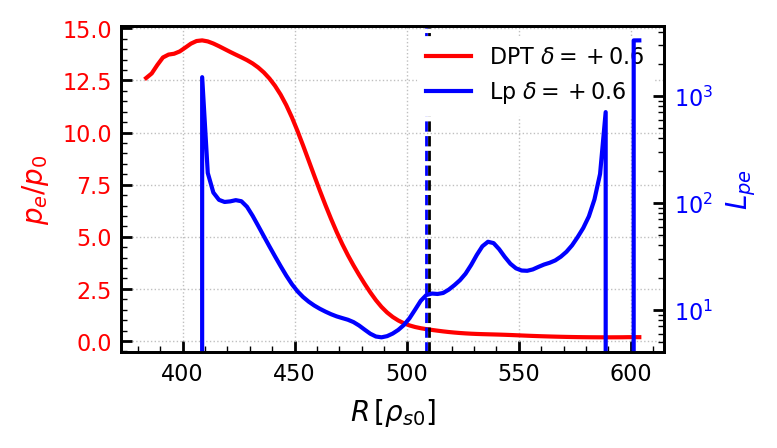

In [7]:
fig, ax1 = plt.subplots(figsize=(fig_width, fig_height), dpi=200)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.3, hspace=None)

# Plot on primary y-axis
ax1.plot(x_DPT_d0p6_SOL, pe_DPT_d0p6_SOL, '-', label=r'DPT $\delta=+0.6$', c='r')
ax1.set_xlabel(r'$R\, [\rho_{s0}]$')
ax1.set_ylabel(r'$p_e/p_0$', color='r')
ax1.tick_params(axis='y', labelcolor='r')
ax1.axvline(x=510, lw=1, c='k', ls='--')
ax1.axvline(x=s.x[ix_OMP_DPT_d0p6], lw=1, c='b', ls='--')

#ax1.set_xlim([420, 550])
#ax1.set_title(r'$p_e/p_0$ and $L_{pe}$')

# Create a secondary y-axis that shares the same x-axis as ax1
ax2 = ax1.twinx()
ax2.plot(x_DPT_d0p6_SOL, Lp_DPT_d0p6_SOL, '-', label=r'Lp $\delta=+0.6$', c='b')
ax2.set_ylabel(r'$L_{pe}$', color='b')
ax2.tick_params(axis='y', labelcolor='b')
ax2.set_yscale('log')
#ax2.set_xlim([440, 530])  # Ensure the x-axis limits match if needed

ax1.grid(True, which='major', lw=0.5)
ax1.grid(True, which='major', alpha=0.8, linestyle=':', linewidth=0.5)
ax1.xaxis.set_minor_locator(AutoMinorLocator())
ax1.yaxis.set_minor_locator(AutoMinorLocator())
ax1.tick_params(which='major', direction="in")
ax1.tick_params(which='minor', direction="in")
ax2.tick_params(which='major', direction="in")
ax2.tick_params(which='minor', direction="in")
    
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='upper right', facecolor='white', framealpha=1)

plt.show()

<div class="alert alert-block alert-info"  style="text-align: center;">
<span style="font-size: 40px;"><b> PT $\delta=+0.6$ / $\nu=0.1$</b></span><br>
</div>

In [8]:
os.chdir('/marconi/home/userexternal/klim0000/scratch/GBS/DN_tria/nu_scan/DPT_nu0p1')
# Print the current working directory
print("Current working directory: {0}".format(cwd))

# Load GBS simulations
s=g.Sim()

Psi_DPT_d0p6_nu0p1 = s.Psi
ixxpt_DPT_d0p6_nu0p1 = s.ixxpt
iyxpt_DPT_d0p6_nu0p1 = s.iyxpt
iy0_DPT_d0p6_nu0p1 = s.iy0
ix0_DPT_d0p6_nu0p1 = s.ix0

ix_OMP_DPT_d0p6_nu0p1 = s.ix0 + PT_OMP_correction
iy_OMP_DPT_d0p6_nu0p1 = s.iy0

correction_DPT_d0p6_nu0p1 = 0 # to fit the Lp position
iLp_DPT_d0p6_nu0p1 = ix_OMP_DPT_d0p6_nu0p1-s.ix0+correction_DPT_d0p6_nu0p1

Current working directory: /marconi/home/userexternal/klim0000/jupyter_notebook/3_GBS_DN_Tria


In [9]:
t_final = s.time[-1]
t_init = t_final - 10
bsign = s.attribute["B0sign"]
t_read = np.linspace(t_init, t_final, 101)

dens_DPT_d0p6_nu0p1 = s.get_field('n', t1=t_init, t2=t_final); 
Te_DPT_d0p6_nu0p1 = s.get_field('Te', t1=t_init, t2=t_final)
pe_DPT_d0p6_nu0p1 = dens_DPT_d0p6_nu0p1 * Te_DPT_d0p6_nu0p1

In [10]:
# Average in time and toroidal direction
pe_DPT_d0p6_nu0p1_avg  = np.mean(pe_DPT_d0p6_nu0p1, axis=(2,3)); 
dens_DPT_d0p6_nu0p1_avg = np.mean(dens_DPT_d0p6_nu0p1, axis=(2,3))

pe_DPT_d0p6_nu0p1_SOL = pe_DPT_d0p6_nu0p1_avg[iy0_DPT_d0p6_nu0p1, ix0_DPT_d0p6_nu0p1::]
x_DPT_d0p6_nu0p1_SOL = s.x[ix0_DPT_d0p6_nu0p1::]
#pe_outboard = pe_avg[s.iy0, SOL_init:SOL_end]
Lp_DPT_d0p6_nu0p1_SOL = -pe_DPT_d0p6_nu0p1_SOL/np.gradient(pe_DPT_d0p6_nu0p1_SOL)

#dens_DPT_d0p6_nu0p1_OMP = dens_DPT_d0p6_nu0p1_avg[iy0_DPT_d0p6_nu0p1][ix_OMP_DPT_d0p6_nu0p1]
#pe_DPT_d0p6_nu0p1_OMP   = pe_DPT_d0p6_nu0p1_avg[iy0_DPT_d0p6_nu0p1][ix_OMP_DPT_d0p6_nu0p1]
#Lp_DPT_d0p6_nu0p1_GBS   = Lp_DPT_d0p6_nu0p1_SOL[iLp_DPT_d0p6_nu0p1]
#Lp_DPT_d0p6_nu0p1_GBS   = np.mean(Lp_DPT_d0p6_nu0p1_SOL[iLp_DPT_d0p6_nu0p1-iPT_avg:iLp_DPT_d0p6_nu0p1])

dens_DPT_d0p6_nu0p1_OMP = np.mean(dens_DPT_d0p6_nu0p1_avg[iy0_DPT_d0p6_nu0p1]
                                  [ix_OMP_DPT_d0p6_nu0p1-iPT_avg:ix_OMP_DPT_d0p6_nu0p1+iPT_avg2])
pe_DPT_d0p6_nu0p1_OMP   = np.mean(pe_DPT_d0p6_nu0p1_avg[iy0_DPT_d0p6_nu0p1]
                                  [ix_OMP_DPT_d0p6_nu0p1-iPT_avg:ix_OMP_DPT_d0p6_nu0p1+iPT_avg2])
Lp_DPT_d0p6_nu0p1_GBS   = np.mean(Lp_DPT_d0p6_nu0p1_SOL[iLp_DPT_d0p6_nu0p1-iPT_avg:iLp_DPT_d0p6_nu0p1+iPT_avg2])

print(Lp_DPT_d0p6_nu0p1_GBS)

6.36290837330777


<div class="alert alert-block alert-info"  style="text-align: center;">
<span style="font-size: 40px;"><b> PT $\delta=+0.6$ / $\nu=1.0$</b></span><br>
</div>

In [11]:
os.chdir('/marconi/home/userexternal/klim0000/scratch/GBS/DN_tria/nu_scan/DPT_nu1')
# Print the current working directory
print("Current working directory: {0}".format(cwd))

# Load GBS simulations
s=g.Sim()

Psi_DPT_d0p6_nu1 = s.Psi
ixxpt_DPT_d0p6_nu1 = s.ixxpt
iyxpt_DPT_d0p6_nu1 = s.iyxpt
iy0_DPT_d0p6_nu1 = s.iy0
ix0_DPT_d0p6_nu1 = s.ix0

ix_OMP_DPT_d0p6_nu1 = s.ix0 + PT_OMP_correction
iy_OMP_DPT_d0p6_nu1 = s.iy0

correction_DPT_d0p6_nu1 = 0 # to fit the Lp position
iLp_DPT_d0p6_nu1 = ix_OMP_DPT_d0p6_nu1 - s.ix0+correction_DPT_d0p6_nu1

Current working directory: /marconi/home/userexternal/klim0000/jupyter_notebook/3_GBS_DN_Tria


In [12]:
t_final = s.time[-1]
t_init = t_final - 10
bsign = s.attribute["B0sign"]
t_read = np.linspace(t_init, t_final, 101)

dens_DPT_d0p6_nu1 = s.get_field('n', t1=t_init, t2=t_final); 
Te_DPT_d0p6_nu1   = s.get_field('Te', t1=t_init, t2=t_final)
pe_DPT_d0p6_nu1   = dens_DPT_d0p6_nu1 * Te_DPT_d0p6_nu1

In [13]:
# Average in time and toroidal direction
pe_DPT_d0p6_nu1_avg  = np.mean(pe_DPT_d0p6_nu1, axis=(2,3)); 
dens_DPT_d0p6_nu1_avg = np.mean(dens_DPT_d0p6_nu1, axis=(2,3))

pe_DPT_d0p6_nu1_SOL = pe_DPT_d0p6_nu1_avg[iy0_DPT_d0p6_nu1, ix0_DPT_d0p6_nu1::]
x_DPT_d0p6_nu1_SOL = s.x[ix0_DPT_d0p6_nu1::]
#pe_outboard = pe_avg[s.iy0, SOL_init:SOL_end]
Lp_DPT_d0p6_nu1_SOL = -pe_DPT_d0p6_nu1_SOL/np.gradient(pe_DPT_d0p6_nu1_SOL)

#dens_DPT_d0p6_nu1_OMP = dens_DPT_d0p6_nu1_avg[iy0_DPT_d0p6_nu1][ix_OMP_DPT_d0p6_nu1]
#pe_DPT_d0p6_nu1_OMP   = pe_DPT_d0p6_nu1_avg[iy0_DPT_d0p6_nu1][ix_OMP_DPT_d0p6_nu1]
#Lp_DPT_d0p6_nu1_GBS   = Lp_DPT_d0p6_nu1_SOL[iLp_DPT_d0p6_nu1]
#Lp_DPT_d0p6_nu1_GBS   = np.mean(Lp_DPT_d0p6_nu1_SOL[iLp_DPT_d0p6_nu1-iPT_avg:iLp_DPT_d0p6_nu1])

dens_DPT_d0p6_nu1_OMP = np.mean(dens_DPT_d0p6_nu1_avg[iy0_DPT_d0p6_nu1]
                                  [ix_OMP_DPT_d0p6_nu1-iPT_avg:ix_OMP_DPT_d0p6_nu1+iPT_avg2])
pe_DPT_d0p6_nu1_OMP   = np.mean(pe_DPT_d0p6_nu1_avg[iy0_DPT_d0p6_nu1]
                                  [ix_OMP_DPT_d0p6_nu1-iPT_avg:ix_OMP_DPT_d0p6_nu1+iPT_avg2])
Lp_DPT_d0p6_nu1_GBS   = np.mean(Lp_DPT_d0p6_nu1_SOL[iLp_DPT_d0p6_nu1-iPT_avg:iLp_DPT_d0p6_nu1+iPT_avg2])

print(Lp_DPT_d0p6_nu1_GBS)

16.22843729818237


<div class="alert alert-block alert-info"  style="text-align: center;">
<span style="font-size: 40px;"><b> PT $\delta=+0.6$ / $S_{T0}=0.05$</b></span><br>
</div>

In [14]:
os.chdir('/marconi/home/userexternal/klim0000/scratch/GBS/DN_tria/st_scan/DPT_st0p05')
# Print the current working directory
print("Current working directory: {0}".format(cwd))

# Load GBS simulations
s=g.Sim()

Psi_DPT_d0p6_st0p05 = s.Psi
ixxpt_DPT_d0p6_st0p05 = s.ixxpt
iyxpt_DPT_d0p6_st0p05 = s.iyxpt
iy0_DPT_d0p6_st0p05 = s.iy0
ix0_DPT_d0p6_st0p05 = s.ix0

ix_OMP_DPT_d0p6_st0p05 = s.ix0 + PT_OMP_correction
iy_OMP_DPT_d0p6_st0p05 = s.iy0

correction_DPT_d0p6_st0p05 = 0 # to fit the Lp position
iLp_DPT_d0p6_st0p05 = ix_OMP_DPT_d0p6_st0p05 - s.ix0+correction_DPT_d0p6_st0p05


Current working directory: /marconi/home/userexternal/klim0000/jupyter_notebook/3_GBS_DN_Tria


In [15]:
t_final = s.time[-1]
t_init = t_final - 10
bsign = s.attribute["B0sign"]
t_read = np.linspace(t_init, t_final, 101)

dens_DPT_d0p6_st0p05 = s.get_field('n', t1=t_init, t2=t_final); 
Te_DPT_d0p6_st0p05   = s.get_field('Te', t1=t_init, t2=t_final)
pe_DPT_d0p6_st0p05   = dens_DPT_d0p6_st0p05 * Te_DPT_d0p6_st0p05

In [16]:

# Average in time and toroidal direction
pe_DPT_d0p6_st0p05_avg  = np.mean(pe_DPT_d0p6_st0p05, axis=(2,3)); 
dens_DPT_d0p6_st0p05_avg = np.mean(dens_DPT_d0p6_st0p05, axis=(2,3))

pe_DPT_d0p6_st0p05_SOL = pe_DPT_d0p6_st0p05_avg[iy0_DPT_d0p6_st0p05, ix0_DPT_d0p6_st0p05::]
x_DPT_d0p6_st0p05_SOL = s.x[ix0_DPT_d0p6_st0p05::]
#pe_outboard = pe_avg[s.iy0, SOL_init:SOL_end]
Lp_DPT_d0p6_st0p05_SOL = -pe_DPT_d0p6_st0p05_SOL/np.gradient(pe_DPT_d0p6_st0p05_SOL)

#dens_DPT_d0p6_st0p05_OMP = dens_DPT_d0p6_st0p05_avg[iy0_DPT_d0p6_st0p05][ix_OMP_DPT_d0p6_st0p05]
#pe_DPT_d0p6_st0p05_OMP   = pe_DPT_d0p6_st0p05_avg[iy0_DPT_d0p6_st0p05][ix_OMP_DPT_d0p6_st0p05]
#Lp_DPT_d0p6_st0p05_GBS   = Lp_DPT_d0p6_st0p05_SOL[iLp_DPT_d0p6_st0p05]
#Lp_DPT_d0p6_st0p05_GBS   = np.mean(Lp_DPT_d0p6_st0p05_SOL[iLp_DPT_d0p6_st0p05-iPT_avg:iLp_DPT_d0p6_st0p05])

dens_DPT_d0p6_st0p05_OMP = np.mean(dens_DPT_d0p6_st0p05_avg[iy0_DPT_d0p6_st0p05]
                                  [ix_OMP_DPT_d0p6_st0p05-iPT_avg:ix_OMP_DPT_d0p6_st0p05+iPT_avg2])
pe_DPT_d0p6_st0p05_OMP   = np.mean(pe_DPT_d0p6_st0p05_avg[iy0_DPT_d0p6_st0p05]
                                  [ix_OMP_DPT_d0p6_st0p05-iPT_avg:ix_OMP_DPT_d0p6_st0p05+iPT_avg2])
Lp_DPT_d0p6_st0p05_GBS   = np.mean(Lp_DPT_d0p6_st0p05_SOL[iLp_DPT_d0p6_st0p05-iPT_avg:iLp_DPT_d0p6_st0p05+iPT_avg2])
print(Lp_DPT_d0p6_st0p05_GBS)

14.551449586256718


<div class="alert alert-block alert-info"  style="text-align: center;">
<span style="font-size: 40px;"><b> PT $\delta=+0.6$ / $S_{T0}=0.3$</b></span><br>
</div>

In [17]:
os.chdir('/marconi/home/userexternal/klim0000/scratch/GBS/DN_tria/st_scan/DPT_st0p3')
# Print the current working directory
print("Current working directory: {0}".format(cwd))

# Load GBS simulations
s=g.Sim()

Psi_DPT_d0p6_st0p3 = s.Psi
ixxpt_DPT_d0p6_st0p3 = s.ixxpt
iyxpt_DPT_d0p6_st0p3 = s.iyxpt
iy0_DPT_d0p6_st0p3 = s.iy0
ix0_DPT_d0p6_st0p3 = s.ix0

ix_OMP_DPT_d0p6_st0p3 = s.ix0 + PT_OMP_correction
iy_OMP_DPT_d0p6_st0p3 = s.iy0

correction_DPT_d0p6_st0p3 = 0 # to fit the Lp position
iLp_DPT_d0p6_st0p3 = ix_OMP_DPT_d0p6_st0p3 - s.ix0+correction_DPT_d0p6_st0p3

Current working directory: /marconi/home/userexternal/klim0000/jupyter_notebook/3_GBS_DN_Tria


In [18]:
t_final = s.time[-1]
t_init = t_final - 10
bsign = s.attribute["B0sign"]
t_read = np.linspace(t_init, t_final, 101)

dens_DPT_d0p6_st0p3 = s.get_field('n', t1=t_init, t2=t_final); 
Te_DPT_d0p6_st0p3   = s.get_field('Te', t1=t_init, t2=t_final)
pe_DPT_d0p6_st0p3   = dens_DPT_d0p6_st0p3 * Te_DPT_d0p6_st0p3

In [19]:

# Average in time and toroidal direction
pe_DPT_d0p6_st0p3_avg  = np.mean(pe_DPT_d0p6_st0p3, axis=(2,3)); 
dens_DPT_d0p6_st0p3_avg = np.mean(dens_DPT_d0p6_st0p3, axis=(2,3))

pe_DPT_d0p6_st0p3_SOL = pe_DPT_d0p6_st0p3_avg[iy0_DPT_d0p6_st0p3, ix0_DPT_d0p6_st0p3::]
x_DPT_d0p6_st0p3_SOL = s.x[ix0_DPT_d0p6_st0p3::]
#pe_outboard = pe_avg[s.iy0, SOL_init:SOL_end]
Lp_DPT_d0p6_st0p3_SOL = -pe_DPT_d0p6_st0p3_SOL/np.gradient(pe_DPT_d0p6_st0p3_SOL)

#dens_DPT_d0p6_st0p3_OMP = dens_DPT_d0p6_st0p3_avg[iy0_DPT_d0p6_st0p3][ix_OMP_DPT_d0p6_st0p3]
#pe_DPT_d0p6_st0p3_OMP   = pe_DPT_d0p6_st0p3_avg[iy0_DPT_d0p6_st0p3][ix_OMP_DPT_d0p6_st0p3]
#Lp_DPT_d0p6_st0p3_GBS   = Lp_DPT_d0p6_st0p3_SOL[iLp_DPT_d0p6_st0p3]
#Lp_DPT_d0p6_st0p3_GBS   = np.mean(Lp_DPT_d0p6_st0p3_SOL[iLp_DPT_d0p6_st0p3-iPT_avg:iLp_DPT_d0p6_st0p3])


dens_DPT_d0p6_st0p3_OMP = np.mean(dens_DPT_d0p6_st0p3_avg[iy0_DPT_d0p6_st0p3]
                                  [ix_OMP_DPT_d0p6_st0p3-iPT_avg:ix_OMP_DPT_d0p6_st0p3+iPT_avg2])
pe_DPT_d0p6_st0p3_OMP   = np.mean(pe_DPT_d0p6_st0p3_avg[iy0_DPT_d0p6_st0p3]
                                  [ix_OMP_DPT_d0p6_st0p3-iPT_avg:ix_OMP_DPT_d0p6_st0p3+iPT_avg2])
Lp_DPT_d0p6_st0p3_GBS   = np.mean(Lp_DPT_d0p6_st0p3_SOL[iLp_DPT_d0p6_st0p3-iPT_avg:iLp_DPT_d0p6_st0p3+iPT_avg2])

print(Lp_DPT_d0p6_st0p3_GBS)

5.259935946356562


<div class="alert alert-block alert-info"  style="text-align: center;">
<span style="font-size: 40px;"><b> NT -0.6 </b></span><br>
</div>

In [20]:
#NT_OMP_correction = 76
NT_OMP_correction = 50
iNT_avg=5
iNT_avg2=0

In [21]:
os.chdir('/marconi_scratch/userexternal/klim0000/GBS/DN_tria/delta_scan/DNT_dn0p6')
# Print the current working directory
print("Current working directory: {0}".format(cwd))

# Load GBS simulations
s=g.Sim()

Psi_DNT_dn0p6 = s.Psi
ixxpt_DNT_dn0p6 = s.ixxpt
iyxpt_DNT_dn0p6 = s.iyxpt
iy0_DNT_dn0p6 = s.iy0
ix0_DNT_dn0p6 = s.ix0


ix_OMP_DNT_dn0p6 = s.ix0 + NT_OMP_correction 
iy_OMP_DNT_dn0p6 = s.iy0

correction_DNT_dn0p6 = 0 # to fit the Lp position
iLp_DNT_dn0p6 = ix_OMP_DNT_dn0p6-s.ix0+correction_DNT_dn0p6

Current working directory: /marconi/home/userexternal/klim0000/jupyter_notebook/3_GBS_DN_Tria


In [22]:
t_final = s.time[-1]
t_init = t_final -10
bsign = s.attribute["B0sign"]
t_read = np.linspace(t_init, t_final, 101)

dens_DNT_dn0p6 = s.get_field('n', t1=t_init, t2=t_final); 
Te_DNT_dn0p6 = s.get_field('Te', t1=t_init, t2=t_final)
pe_DNT_dn0p6 = dens_DNT_dn0p6 * Te_DNT_dn0p6

In [23]:
# Average in time and toroidal direction
pe_DNT_dn0p6_avg  = np.mean(pe_DNT_dn0p6, axis=(2,3)); 
dens_DNT_dn0p6_avg = np.mean(dens_DNT_dn0p6, axis=(2,3))

pe_DNT_dn0p6_SOL = pe_DNT_dn0p6_avg[iy0_DNT_dn0p6, ix0_DNT_dn0p6::]
x_DNT_dn0p6_SOL = s.x[ix0_DNT_dn0p6::]
#pe_outboard = pe_avg[s.iy0, SOL_init:SOL_end]
Lp_DNT_dn0p6_SOL = -pe_DNT_dn0p6_SOL/np.gradient(pe_DNT_dn0p6_SOL)

#dens_DNT_dn0p6_OMP = dens_DNT_dn0p6_avg[iy0_DNT_dn0p6][ix_OMP_DNT_dn0p6]
#pe_DNT_dn0p6_OMP   = pe_DNT_dn0p6_avg[iy0_DNT_dn0p6][ix_OMP_DNT_dn0p6]
#Lp_DNT_dn0p6_GBS   = Lp_DNT_dn0p6_SOL[iLp_DNT_dn0p6-iNT_avg]
#Lp_DNT_dn0p6_nu0p1_GBS   = np.mean(Lp_DNT_dn0p6_nu0p1_SOL[iLp_DNT_dn0p6_nu0p1-iNT_avg:iLp_DNT_dn0p6_nu0p1-5])

dens_DNT_dn0p6_OMP = np.mean(dens_DNT_dn0p6_avg[iy0_DNT_dn0p6][ix_OMP_DNT_dn0p6-iNT_avg:ix_OMP_DNT_dn0p6+iNT_avg2])
pe_DNT_dn0p6_OMP   = np.mean(pe_DNT_dn0p6_avg[iy0_DNT_dn0p6][ix_OMP_DNT_dn0p6-iNT_avg:ix_OMP_DNT_dn0p6+iNT_avg2])
Lp_DNT_dn0p6_GBS   = np.mean(Lp_DNT_dn0p6_SOL[iLp_DNT_dn0p6-iNT_avg:iLp_DNT_dn0p6+iNT_avg2])
print(Lp_DNT_dn0p6_GBS)

14.039533506981849


DNT -0.6, the position of the separatrix is x=420


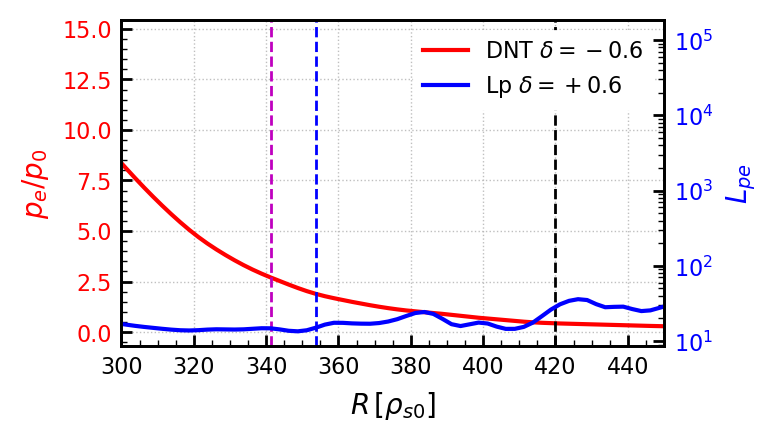

In [24]:
fig, ax1 = plt.subplots(figsize=(fig_width, fig_height), dpi=200)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.3, hspace=None)

# Plot on primary y-axis
ax1.plot(x_DNT_dn0p6_SOL, pe_DNT_dn0p6_SOL, '-', label=r'DNT $\delta=-0.6$', c='r')

ax1.set_xlabel(r'$R\, [\rho_{s0}]$')
ax1.set_ylabel(r'$p_e/p_0$', color='r')
ax1.tick_params(axis='y', labelcolor='r')

print("DNT -0.6, the position of the separatrix is x=420")
ax1.axvline(x=420, lw=1, c='k', ls='--')

ax1.axvline(x=s.x[ix_OMP_DNT_dn0p6], lw=1, c='b', ls='--')
ax1.axvline(x=s.x[ix_OMP_DNT_dn0p6-5], lw=1, c='m', ls='--')

ax1.set_xlim([300, 450])
#ax1.set_ylim([0, 10])
#ax1.set_title(r'$p_e/p_0$ and $L_{pe}$')

# Create a secondary y-axis that shares the same x-axis as ax1
ax2 = ax1.twinx()
ax2.plot(x_DNT_dn0p6_SOL, Lp_DNT_dn0p6_SOL, '-', label=r'Lp $\delta=+0.6$', c='b')
ax2.set_ylabel(r'$L_{pe}$', color='b')
ax2.tick_params(axis='y', labelcolor='b')
ax2.set_yscale('log')
#ax2.set_xlim([400, 450])  # Ensure the x-axis limits match if needed

ax1.grid(True, which='major', lw=0.5)
ax1.grid(True, which='major', alpha=0.8, linestyle=':', linewidth=0.5)
ax1.xaxis.set_minor_locator(AutoMinorLocator())
ax1.yaxis.set_minor_locator(AutoMinorLocator())
ax1.tick_params(which='major', direction="in")
ax1.tick_params(which='minor', direction="in")
ax2.tick_params(which='major', direction="in")
ax2.tick_params(which='minor', direction="in")
    
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='upper right', facecolor='white', framealpha=1)

plt.show()


<div class="alert alert-block alert-info"  style="text-align: center;">
<span style="font-size: 40px;"><b> NT -0.6 / $\nu=0.1$ </b></span><br>
</div>

In [25]:
os.chdir('/marconi_scratch/userexternal/klim0000/GBS/DN_tria/nu_scan/DNT_nu0p1')
# Print the current working directory
print("Current working directory: {0}".format(cwd))

# Load GBS simulations
s=g.Sim()

Psi_DNT_dn0p6_nu0p1 = s.Psi
ixxpt_DNT_dn0p6_nu0p1 = s.ixxpt
iyxpt_DNT_dn0p6_nu0p1 = s.iyxpt
iy0_DNT_dn0p6_nu0p1 = s.iy0
ix0_DNT_dn0p6_nu0p1 = s.ix0

ix_OMP_DNT_dn0p6_nu0p1 = s.ix0 + NT_OMP_correction
iy_OMP_DNT_dn0p6_nu0p1 = s.iy0

correction_DNT_dn0p6_nu0p1 = 0 # to fit the Lp position
iLp_DNT_dn0p6_nu0p1 = ix_OMP_DNT_dn0p6_nu0p1-s.ix0+correction_DNT_dn0p6_nu0p1

t_final = s.time[-1]
t_init = t_final - 10
bsign = s.attribute["B0sign"]
t_read = np.linspace(t_init, t_final, 101)

dens_DNT_dn0p6_nu0p1 = s.get_field('n', t1=t_init, t2=t_final); 
Te_DNT_dn0p6_nu0p1 = s.get_field('Te', t1=t_init, t2=t_final)
pe_DNT_dn0p6_nu0p1 = dens_DNT_dn0p6_nu0p1 * Te_DNT_dn0p6_nu0p1

# Average in time and toroidal direction
pe_DNT_dn0p6_nu0p1_avg  = np.mean(pe_DNT_dn0p6_nu0p1, axis=(2,3)); 
dens_DNT_dn0p6_nu0p1_avg = np.mean(dens_DNT_dn0p6_nu0p1, axis=(2,3))

Current working directory: /marconi/home/userexternal/klim0000/jupyter_notebook/3_GBS_DN_Tria


In [26]:
pe_DNT_dn0p6_nu0p1_SOL = pe_DNT_dn0p6_nu0p1_avg[iy0_DNT_dn0p6_nu0p1, ix0_DNT_dn0p6_nu0p1::]
x_DNT_dn0p6_nu0p1_SOL = s.x[ix0_DNT_dn0p6_nu0p1::]
#pe_outboard = pe_avg[s.iy0, SOL_init:SOL_end]
Lp_DNT_dn0p6_nu0p1_SOL = -pe_DNT_dn0p6_nu0p1_SOL/np.gradient(pe_DNT_dn0p6_nu0p1_SOL)

#dens_DNT_dn0p6_nu0p1_OMP = dens_DNT_dn0p6_nu0p1_avg[iy0_DNT_dn0p6_nu0p1][ix_OMP_DNT_dn0p6_nu0p1]
#pe_DNT_dn0p6_nu0p1_OMP   = pe_DNT_dn0p6_nu0p1_avg[iy0_DNT_dn0p6_nu0p1][ix_OMP_DNT_dn0p6_nu0p1]
#Lp_DNT_dn0p6_nu0p1_GBS   = Lp_DNT_dn0p6_nu0p1_SOL[iLp_DNT_dn0p6_nu0p1-iNT_avg]
#Lp_DNT_dn0p6_nu0p1_GBS   = np.mean(Lp_DNT_dn0p6_nu0p1_SOL[iLp_DNT_dn0p6_nu0p1-iNT_avg:iLp_DNT_dn0p6_nu0p1-5])

dens_DNT_dn0p6_nu0p1_OMP = np.mean(dens_DNT_dn0p6_nu0p1_avg[iy0_DNT_dn0p6_nu0p1]
                                   [ix_OMP_DNT_dn0p6_nu0p1-iNT_avg:ix_OMP_DNT_dn0p6_nu0p1+iNT_avg2])
pe_DNT_dn0p6_nu0p1_OMP   = np.mean(pe_DNT_dn0p6_nu0p1_avg[iy0_DNT_dn0p6_nu0p1]
                                   [ix_OMP_DNT_dn0p6_nu0p1-iNT_avg:ix_OMP_DNT_dn0p6_nu0p1+iNT_avg2])
Lp_DNT_dn0p6_nu0p1_GBS   = np.mean(Lp_DNT_dn0p6_nu0p1_SOL[iLp_DNT_dn0p6_nu0p1-iNT_avg:iLp_DNT_dn0p6_nu0p1+iNT_avg2])
print(Lp_DNT_dn0p6_nu0p1_GBS)

13.38452842770343


<div class="alert alert-block alert-info"  style="text-align: center;">
<span style="font-size: 40px;"><b> NT -0.6 / $\nu=1$ </b></span><br>
</div>

In [27]:
os.chdir('/marconi_scratch/userexternal/klim0000/GBS/DN_tria/nu_scan/DNT_nu1')
# Print the current working directory
print("Current working directory: {0}".format(cwd))

# Load GBS simulations
s=g.Sim()

Psi_DNT_dn0p6_nu1 = s.Psi
ixxpt_DNT_dn0p6_nu1 = s.ixxpt
iyxpt_DNT_dn0p6_nu1 = s.iyxpt
iy0_DNT_dn0p6_nu1 = s.iy0
ix0_DNT_dn0p6_nu1 = s.ix0

ix_OMP_DNT_dn0p6_nu1 = s.ix0 + NT_OMP_correction
iy_OMP_DNT_dn0p6_nu1 = s.iy0

correction_DNT_dn0p6_nu1 = 0 # to fit the Lp position
iLp_DNT_dn0p6_nu1 = ix_OMP_DNT_dn0p6_nu1-s.ix0+correction_DNT_dn0p6_nu1


Current working directory: /marconi/home/userexternal/klim0000/jupyter_notebook/3_GBS_DN_Tria


In [28]:

t_final = s.time[-1]
t_init = t_final - 10
bsign = s.attribute["B0sign"]
t_read = np.linspace(t_init, t_final, 101)

dens_DNT_dn0p6_nu1 = s.get_field('n', t1=t_init, t2=t_final); 
Te_DNT_dn0p6_nu1 = s.get_field('Te', t1=t_init, t2=t_final)
pe_DNT_dn0p6_nu1 = dens_DNT_dn0p6_nu1 * Te_DNT_dn0p6_nu1

# Average in time and toroidal direction
pe_DNT_dn0p6_nu1_avg  = np.mean(pe_DNT_dn0p6_nu1, axis=(2,3)); 
dens_DNT_dn0p6_nu1_avg = np.mean(dens_DNT_dn0p6_nu1, axis=(2,3))

In [29]:
pe_DNT_dn0p6_nu1_SOL = pe_DNT_dn0p6_nu1_avg[iy0_DNT_dn0p6_nu1, ix0_DNT_dn0p6_nu1::]
x_DNT_dn0p6_nu1_SOL = s.x[ix0_DNT_dn0p6_nu1::]
#pe_outboard = pe_avg[s.iy0, SOL_init:SOL_end]
Lp_DNT_dn0p6_nu1_SOL = -pe_DNT_dn0p6_nu1_SOL/np.gradient(pe_DNT_dn0p6_nu1_SOL)

#dens_DNT_dn0p6_nu1_OMP = dens_DNT_dn0p6_nu1_avg[iy0_DNT_dn0p6_nu1][ix_OMP_DNT_dn0p6_nu1]
#pe_DNT_dn0p6_nu1_OMP   = pe_DNT_dn0p6_nu1_avg[iy0_DNT_dn0p6_nu1][ix_OMP_DNT_dn0p6_nu1]
#Lp_DNT_dn0p6_nu1_GBS   = Lp_DNT_dn0p6_nu1_SOL[iLp_DNT_dn0p6_nu1]
#Lp_DNT_dn0p6_nu1_GBS   = Lp_DNT_dn0p6_nu1_SOL[iLp_DNT_dn0p6_nu1-iNT_avg]

dens_DNT_dn0p6_nu1_OMP = np.mean(dens_DNT_dn0p6_nu1_avg[iy0_DNT_dn0p6_nu1]
                                   [ix_OMP_DNT_dn0p6_nu1-iNT_avg:ix_OMP_DNT_dn0p6_nu1+iNT_avg2])
pe_DNT_dn0p6_nu1_OMP   = np.mean(pe_DNT_dn0p6_nu1_avg[iy0_DNT_dn0p6_nu1]
                                   [ix_OMP_DNT_dn0p6_nu1-iNT_avg:ix_OMP_DNT_dn0p6_nu1+iNT_avg2])
Lp_DNT_dn0p6_nu1_GBS   = np.mean(Lp_DNT_dn0p6_nu1_SOL[iLp_DNT_dn0p6_nu1-iNT_avg:iLp_DNT_dn0p6_nu1+iNT_avg2])
print(Lp_DNT_dn0p6_nu1_GBS)

22.102521956463043


<div class="alert alert-block alert-info"  style="text-align: center;">
<span style="font-size: 40px;"><b> NT -0.6 / $S_{T0}=0.05$ </b></span><br>
</div>

In [30]:
os.chdir('/marconi_scratch/userexternal/klim0000/GBS/DN_tria/st_scan/DNT_st0p05')
# Print the current working directory
print("Current working directory: {0}".format(cwd))

# Load GBS simulations
s=g.Sim()

Psi_DNT_dn0p6_st0p05 = s.Psi
ixxpt_DNT_dn0p6_st0p05 = s.ixxpt
iyxpt_DNT_dn0p6_st0p05 = s.iyxpt
iy0_DNT_dn0p6_st0p05 = s.iy0
ix0_DNT_dn0p6_st0p05 = s.ix0

ix_OMP_DNT_dn0p6_st0p05 = s.ix0 + NT_OMP_correction
iy_OMP_DNT_dn0p6_st0p05 = s.iy0

correction_DNT_dn0p6_st0p05 = 0 # to fit the Lp position
iLp_DNT_dn0p6_st0p05 = ix_OMP_DNT_dn0p6_st0p05-s.ix0+correction_DNT_dn0p6_st0p05


Current working directory: /marconi/home/userexternal/klim0000/jupyter_notebook/3_GBS_DN_Tria


In [31]:
t_final = s.time[-1]
t_init = t_final - 10
bsign = s.attribute["B0sign"]
t_read = np.linspace(t_init, t_final, 101)

dens_DNT_dn0p6_st0p05 = s.get_field('n', t1=t_init, t2=t_final); 
Te_DNT_dn0p6_st0p05 = s.get_field('Te', t1=t_init, t2=t_final)
pe_DNT_dn0p6_st0p05 = dens_DNT_dn0p6_st0p05 * Te_DNT_dn0p6_st0p05

# Average in time and toroidal direction
pe_DNT_dn0p6_st0p05_avg  = np.mean(pe_DNT_dn0p6_st0p05, axis=(2,3)); 
dens_DNT_dn0p6_st0p05_avg = np.mean(dens_DNT_dn0p6_st0p05, axis=(2,3))

In [32]:
pe_DNT_dn0p6_st0p05_SOL = pe_DNT_dn0p6_st0p05_avg[iy0_DNT_dn0p6_st0p05, ix0_DNT_dn0p6_st0p05::]
x_DNT_dn0p6_st0p05_SOL = s.x[ix0_DNT_dn0p6_st0p05::]
#pe_outboard = pe_avg[s.iy0, SOL_init:SOL_end]
Lp_DNT_dn0p6_st0p05_SOL = -pe_DNT_dn0p6_st0p05_SOL/np.gradient(pe_DNT_dn0p6_st0p05_SOL)

#dens_DNT_dn0p6_st0p05_OMP = dens_DNT_dn0p6_st0p05_avg[iy0_DNT_dn0p6_st0p05][ix_OMP_DNT_dn0p6_st0p05]
#pe_DNT_dn0p6_st0p05_OMP   = pe_DNT_dn0p6_st0p05_avg[iy0_DNT_dn0p6_st0p05][ix_OMP_DNT_dn0p6_st0p05]
#Lp_DNT_dn0p6_st0p05_GBS   = Lp_DNT_dn0p6_st0p05_SOL[iLp_DNT_dn0p6_st0p05-iNT_avg]

#Lp_DNT_dn0p6_st0p05_GBS   = np.mean(Lp_DNT_dn0p6_st0p05_SOL[iLp_DNT_dn0p6_st0p05-iNT_avg:iLp_DNT_dn0p6_st0p05-5])

dens_DNT_dn0p6_st0p05_OMP = np.mean(dens_DNT_dn0p6_st0p05_avg[iy0_DNT_dn0p6_st0p05]
                                   [ix_OMP_DNT_dn0p6_st0p05-iNT_avg:ix_OMP_DNT_dn0p6_st0p05+iNT_avg2])
pe_DNT_dn0p6_st0p05_OMP   = np.mean(pe_DNT_dn0p6_st0p05_avg[iy0_DNT_dn0p6_st0p05]
                                   [ix_OMP_DNT_dn0p6_st0p05-iNT_avg:ix_OMP_DNT_dn0p6_st0p05+iNT_avg2])
Lp_DNT_dn0p6_st0p05_GBS   = np.mean(Lp_DNT_dn0p6_st0p05_SOL[iLp_DNT_dn0p6_st0p05-iNT_avg
                                                            :iLp_DNT_dn0p6_st0p05+iNT_avg2])

print(Lp_DNT_dn0p6_st0p05_GBS)

15.981337680776013


<div class="alert alert-block alert-info"  style="text-align: center;">
<span style="font-size: 40px;"><b> NT -0.6 / $S_{T0}=0.3$ </b></span><br>
</div>

In [33]:
os.chdir('/marconi_scratch/userexternal/klim0000/GBS/DN_tria/st_scan/DNT_st0p3')
# Print the current working directory
print("Current working directory: {0}".format(cwd))

# Load GBS simulations
s=g.Sim()

Psi_DNT_dn0p6_st0p3 = s.Psi
ixxpt_DNT_dn0p6_st0p3 = s.ixxpt
iyxpt_DNT_dn0p6_st0p3 = s.iyxpt
iy0_DNT_dn0p6_st0p3 = s.iy0
ix0_DNT_dn0p6_st0p3 = s.ix0

ix_OMP_DNT_dn0p6_st0p3 = s.ix0 + NT_OMP_correction
iy_OMP_DNT_dn0p6_st0p3 = s.iy0

correction_DNT_dn0p6_st0p3 = 0 # to fit the Lp position
iLp_DNT_dn0p6_st0p3 = ix_OMP_DNT_dn0p6_st0p3-s.ix0+correction_DNT_dn0p6_st0p3

Current working directory: /marconi/home/userexternal/klim0000/jupyter_notebook/3_GBS_DN_Tria


In [34]:
t_final = s.time[-1]
t_init = t_final - 10
bsign = s.attribute["B0sign"]
t_read = np.linspace(t_init, t_final, 101)

dens_DNT_dn0p6_st0p3 = s.get_field('n', t1=t_init, t2=t_final); 
Te_DNT_dn0p6_st0p3 = s.get_field('Te', t1=t_init, t2=t_final)
pe_DNT_dn0p6_st0p3 = dens_DNT_dn0p6_st0p3 * Te_DNT_dn0p6_st0p3

# Average in time and toroidal direction
pe_DNT_dn0p6_st0p3_avg  = np.mean(pe_DNT_dn0p6_st0p3, axis=(2,3)); 
dens_DNT_dn0p6_st0p3_avg = np.mean(dens_DNT_dn0p6_st0p3, axis=(2,3))

In [35]:
pe_DNT_dn0p6_st0p3_SOL = pe_DNT_dn0p6_st0p3_avg[iy0_DNT_dn0p6_st0p3, ix0_DNT_dn0p6_st0p3::]
x_DNT_dn0p6_st0p3_SOL = s.x[ix0_DNT_dn0p6_st0p3::]
#pe_outboard = pe_avg[s.iy0, SOL_init:SOL_end]
Lp_DNT_dn0p6_st0p3_SOL = -pe_DNT_dn0p6_st0p3_SOL/np.gradient(pe_DNT_dn0p6_st0p3_SOL)

#dens_DNT_dn0p6_st0p3_OMP = dens_DNT_dn0p6_st0p3_avg[iy0_DNT_dn0p6_st0p3][ix_OMP_DNT_dn0p6_st0p3]
#pe_DNT_dn0p6_st0p3_OMP   = pe_DNT_dn0p6_st0p3_avg[iy0_DNT_dn0p6_st0p3][ix_OMP_DNT_dn0p6_st0p3]
#Lp_DNT_dn0p6_st0p3_GBS   = Lp_DNT_dn0p6_st0p3_SOL[iLp_DNT_dn0p6_st0p3-iNT_avg]
#Lp_DNT_dn0p6_st0p3_GBS   = np.mean(Lp_DNT_dn0p6_st0p3_SOL[iLp_DNT_dn0p6_st0p3-iNT_avg:iLp_DNT_dn0p6_st0p3-7])


dens_DNT_dn0p6_st0p3_OMP = np.mean(dens_DNT_dn0p6_st0p3_avg[iy0_DNT_dn0p6_st0p3]
                                   [ix_OMP_DNT_dn0p6_st0p3-iNT_avg:ix_OMP_DNT_dn0p6_st0p3+iNT_avg2])
pe_DNT_dn0p6_st0p3_OMP   = np.mean(pe_DNT_dn0p6_st0p3_avg[iy0_DNT_dn0p6_st0p3]
                                   [ix_OMP_DNT_dn0p6_st0p3-iNT_avg:ix_OMP_DNT_dn0p6_st0p3+iNT_avg2])
Lp_DNT_dn0p6_st0p3_GBS   = np.mean(Lp_DNT_dn0p6_st0p3_SOL[iLp_DNT_dn0p6_st0p3-iNT_avg:iLp_DNT_dn0p6_st0p3+iNT_avg2])
print(Lp_DNT_dn0p6_st0p3_GBS)

14.517436443801325


<div class="alert alert-block alert-info"  style="text-align: center;">
<span style="font-size: 40px;"><b> Stack all the datasets in array
</b></span><br>
</div>

In [36]:
dens_OMP = []; pe_OMP = []; Lp_OMP = []; Lp_GBS = []

# dens PT
dens_OMP.append(dens_DPT_d0p6_OMP)
dens_OMP.append(dens_DPT_d0p6_nu0p1_OMP)
dens_OMP.append(dens_DPT_d0p6_nu1_OMP)
dens_OMP.append(dens_DPT_d0p6_st0p05_OMP)
dens_OMP.append(dens_DPT_d0p6_st0p3_OMP)
# denes NT
dens_OMP.append(dens_DNT_dn0p6_OMP)
dens_OMP.append(dens_DNT_dn0p6_nu0p1_OMP)
dens_OMP.append(dens_DNT_dn0p6_nu1_OMP)
dens_OMP.append(dens_DNT_dn0p6_st0p05_OMP)
dens_OMP.append(dens_DNT_dn0p6_st0p3_OMP)

# pe PT
pe_OMP.append(pe_DPT_d0p6_OMP)
pe_OMP.append(pe_DPT_d0p6_nu0p1_OMP)
pe_OMP.append(pe_DPT_d0p6_nu1_OMP)
pe_OMP.append(pe_DPT_d0p6_st0p05_OMP)
pe_OMP.append(pe_DPT_d0p6_st0p3_OMP)
# pe NT
pe_OMP.append(pe_DNT_dn0p6_OMP)
pe_OMP.append(pe_DNT_dn0p6_nu0p1_OMP)
pe_OMP.append(pe_DNT_dn0p6_nu1_OMP)
pe_OMP.append(pe_DNT_dn0p6_st0p05_OMP)
pe_OMP.append(pe_DNT_dn0p6_st0p3_OMP)


# Lp PT
Lp_GBS.append(Lp_DPT_d0p6_GBS)
Lp_GBS.append(Lp_DPT_d0p6_nu0p1_GBS)
Lp_GBS.append(Lp_DPT_d0p6_nu1_GBS)
Lp_GBS.append(Lp_DPT_d0p6_st0p05_GBS)
Lp_GBS.append(Lp_DPT_d0p6_st0p3_GBS)
# Lp NT
Lp_GBS.append(Lp_DNT_dn0p6_GBS)
Lp_GBS.append(Lp_DNT_dn0p6_nu0p1_GBS)
Lp_GBS.append(Lp_DNT_dn0p6_nu1_GBS)
Lp_GBS.append(Lp_DNT_dn0p6_st0p05_GBS)
Lp_GBS.append(Lp_DNT_dn0p6_st0p3_GBS)

<div class="alert alert-block alert-info"  style="text-align: center;">
<span style="font-size: 40px;"><b> Analytical Lp estimate </b></span><br>
    <br>
    <br>
    $$L_p \propto \mathcal{C}(\kappa, \delta, q)\Bigg[\rho_*(\nu_0 \bar{n} q^2)^2 \bigg(\frac{L_\chi \bar{p}_e}{S_p} \bigg)^{4} \Bigg]^{1/3}$$
</div>

In [65]:
# The power integration is computed from the script in the same foled
# '2_2_Source_volumic_integration.ipynb'. All the values are averaged during 10 GBS time unit.

Sp_DPT_d0p6 = [60.05]
Sp_DPT_d0p6_nu0p1 = [72.786]
Sp_DPT_d0p6_nu1 = [41.071]
Sp_DPT_d0p6_st0p05 = [24.041]
Sp_DPT_d0p6_st0p3 = [110.843]


Sp_DNT_dn0p6= [54.36]
Sp_DNT_dn0p6_nu0p1= [64.22]
Sp_DNT_dn0p6_nu1= [40.302]
Sp_DNT_dn0p6_st0p05 = [26.177]
Sp_DNT_dn0p6_st0p3  = [100.314]

Sp_tot = (Sp_DPT_d0p6 + Sp_DPT_d0p6_nu0p1 + Sp_DPT_d0p6_nu1 + Sp_DPT_d0p6_st0p05 + Sp_DPT_d0p6_st0p3
          + Sp_DNT_dn0p6+ Sp_DNT_dn0p6_nu0p1 + Sp_DNT_dn0p6_nu1 + Sp_DNT_dn0p6_st0p05 + Sp_DNT_dn0p6_st0p3)


In [66]:
Lp_theory = []; Lchi=[]; Curvature=[]

rhostar = 1/700
kappa = 1.7
delta = [0.6, 0.6, 0.6, 0.6, 0.6, -0.6, -0.6, -0.6, -0.6, -0.6]
q95 = [2.9,2.9,2.9,2.9,2.9,4,4,4,4,4]
minor_radius = 167
nu = [0.3, 0.1, 1.0, 0.3, 0.3, 0.3, 0.1, 1.0, 0.3, 0.3]
cst= 2

# Test
#Curvature = [1] * 10
#Lchi = [859] * 10
# Poloidal length
for i in range(len(delta)):
    Lchi.append(np.pi * minor_radius * (0.45 + 0.55 * kappa) + 1.33 * minor_radius * delta[i])
    #Lchi.append(2*np.pi * minor_radius * np.sqrt((1+kappa**2)/2))

    # Curvature operator
    C1 = 1
    C2 = (delta[i]*q95[i]) /(1+q95[i])
    C3 = delta[i]**2 * (7*q95[i]-1) / (16 * (1+q95[i]))
    C4 = -1 * ((kappa - 1) / (kappa +1)) * (3*q95[i]/(q95[i]+2))
    C5 = 1 * (kappa-1)**2 * (5*q95[i]-2) / (2*(kappa+1)**2 * (2+q95[i]))
    Curvature.append(C1 + C2 + C3 + C4 + C5)

for i in range(len(delta)):
    Lp_theory.append(cst*Curvature[i] * (rhostar * (nu[i] * dens_OMP[i] * q95[i]**2)**2 
                                  * (Lchi[i] * pe_OMP[i] / Sp_tot[i])**4)**(1/3))

    #Lp_theory.append(cst*(rhostar/2 * (nu[i] * dens_OMP[i] * q95[i]**2)**2 
    #                              * (Lchi[i] * pe_OMP[i] / Sp_tot[i])**4)**(1/3))

print(Lp_theory)

[9.095910550597704, 11.15058580881688, 14.406729890048167, 15.168325849219707, 8.237135942738398, 12.066454691101969, 11.613087325680171, 14.831476615668178, 14.851655596547944, 13.463684792040057]


In [67]:
print("Current fitting prefactor is ", cst)
for i in range(len(Lp_GBS)):
    print("GBS=", Lp_GBS[i], "and Theory=", Lp_theory[i])

Current fitting prefactor is  2
GBS= 8.839445438797547 and Theory= 9.095910550597704
GBS= 6.36290837330777 and Theory= 11.15058580881688
GBS= 16.22843729818237 and Theory= 14.406729890048167
GBS= 14.551449586256718 and Theory= 15.168325849219707
GBS= 5.259935946356562 and Theory= 8.237135942738398
GBS= 14.039533506981849 and Theory= 12.066454691101969
GBS= 13.38452842770343 and Theory= 11.613087325680171
GBS= 22.102521956463043 and Theory= 14.831476615668178
GBS= 15.981337680776013 and Theory= 14.851655596547944
GBS= 14.517436443801325 and Theory= 13.463684792040057


<div class="alert alert-block alert-info"  style="text-align: center;">
<span style="font-size: 40px;"><b> Final scientific figure</|b></span>
</div>

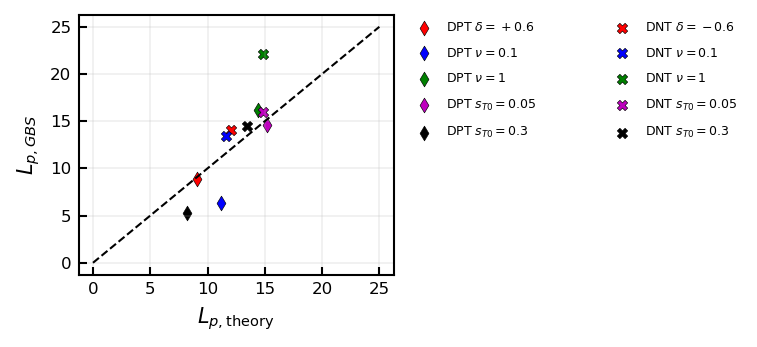

In [71]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import AutoMinorLocator
import os


# Define your figure width and height
fig, ax = plt.subplots(figsize=(fig_width, fig_height), dpi=150)


plt.subplots_adjust(left=0.15, right=0.75, top=0.9, bottom=0.1)

x = np.linspace(0, 25, 40)
y = x
ax.plot(x, y, c='k', ls='--', lw=1)


p1=ax.scatter(Lp_theory[0], Lp_GBS[0], c='r', marker='d', label=r'DPT $\delta=+0.6$' ,ec='k', lw=0.3)
p2=ax.scatter(Lp_theory[1], Lp_GBS[1], c='b', marker='d', label=r'DPT $\nu=0.1$' ,ec='k', lw=0.3)
p3=ax.scatter(Lp_theory[2], Lp_GBS[2], c='g', marker='d', label=r'DPT $\nu=1$' ,ec='k', lw=0.3)
p4=ax.scatter(Lp_theory[3], Lp_GBS[3], c='m', marker='d', label=r'DPT $s_{T0}=0.05$' ,ec='k', lw=0.3)
p5=ax.scatter(Lp_theory[4], Lp_GBS[4], c='k', marker='d', label=r'DPT $s_{T0}=0.3$' ,ec='k', lw=0.3)
p6=ax.scatter(Lp_theory[5], Lp_GBS[5], c='r', marker='X', label=r'DNT $\delta=-0.6$' ,ec='k', lw=0.3)
p7=ax.scatter(Lp_theory[6], Lp_GBS[6], c='b', marker='X', label=r'DNT $\nu=0.1$' ,ec='k', lw=0.3)
p8=ax.scatter(Lp_theory[7], Lp_GBS[7], c='g', marker='X', label=r'DNT $\nu=1$' ,ec='k', lw=0.3)
p9=ax.scatter(Lp_theory[8], Lp_GBS[8], c='m', marker='X', label=r'DNT $s_{T0}=0.05$' ,ec='k', lw=0.3)
p10=ax.scatter(Lp_theory[9], Lp_GBS[9], c='k', marker='X', label=r'DNT $s_{T0}=0.3$' ,ec='k', lw=0.3)

#ax.scatter(Lp_theory, Lp_GBS, c='b', marker='d', label=r'DNT $\delta=-0.6$' ,ec='k', lw=0.3)

# Collecting handles and labels for DN
handles_PT, labels_PT = [], []
for handle, label in zip(*ax.get_legend_handles_labels()):
    if 'PT' in label:
        handles_PT.append(handle)
        labels_PT.append(label)

# Collecting handles and labels for LSN and USN
handles_NT, labels_NT = [], []
for handle, label in zip(*ax.get_legend_handles_labels()):
    if 'NT' in label:
        handles_NT.append(handle)
        labels_NT.append(label)

# Creating the legends
leg_PT = ax.legend(handles_PT, labels_PT, loc='upper left', bbox_to_anchor=(1.02, 1.02), frameon=True, 
                   fontsize=6, markerscale=1, facecolor='white' , labelspacing=1, handlelength=2,
                   edgecolor='black')
leg_NT = ax.legend(handles_NT, labels_NT, loc='upper left', bbox_to_anchor=(1.65, 1.02),
                frameon=True, fontsize=6, markerscale=1, facecolor='white', labelspacing=1, handlelength=2)

# Set the alpha for the legend's background
leg_PT.get_frame().set_alpha(1)
leg_NT.get_frame().set_alpha(1)
# Set the edge linewidth for the legend's frame
leg_PT.get_frame().set_linewidth(0.)
leg_NT.get_frame().set_linewidth(0.)

# Adding the DN legend manually to the axes
ax.add_artist(leg_PT)


ax.grid(True, which='major', alpha=0.2, linestyle='-')
ax.grid(True, which='minor', alpha=0., linestyle='-')
ax.xaxis.set_tick_params(which='minor', direction="in")
ax.xaxis.set_tick_params(which='major', direction="in")
ax.yaxis.set_tick_params(which='minor', direction="in")
ax.yaxis.set_tick_params(which='major', direction="in")

ax.set_xlabel(r'$L_{p,\rm{theory}}$')
ax.set_ylabel(r'$L_{p,GBS}$')

# Save the figure
dpi_val = 300
home_directory = os.path.expanduser('~')
os.chdir(home_directory)
#plt.savefig("Lp_comparison.pdf", bbox_inches='tight', format='pdf', pad_inches=0.01, dpi=dpi_val)